## Requirements

In [40]:
import pandas as pd
import numpy as np

## Dataset Preparation

In [41]:
df_test = pd.read_csv("data/data_test.csv", encoding='utf-8')
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2160 entries, 0 to 2159
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 2160 non-null   int64  
 1   tanggal_waktu      2160 non-null   object 
 2   suhu               2160 non-null   float64
 3   beban_listrik      2160 non-null   float64
 4   kecepatan_angin    2160 non-null   float64
 5   tekanan_udara      2160 non-null   float64
 6   dampak_lingkungan  2160 non-null   object 
dtypes: float64(4), int64(1), object(2)
memory usage: 118.3+ KB


In [42]:
df_train = pd.read_csv("data/data_train.csv", encoding='utf-8')
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24336 entries, 0 to 24335
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 24336 non-null  int64  
 1   tanggal_waktu      24336 non-null  object 
 2   suhu               24336 non-null  float64
 3   beban_listrik      24336 non-null  float64
 4   kecepatan_angin    24336 non-null  float64
 5   tekanan_udara      24336 non-null  float64
 6   dampak_lingkungan  24336 non-null  object 
 7   konsumsi_listrik   24283 non-null  float64
dtypes: float64(5), int64(1), object(2)
memory usage: 1.5+ MB


## Preprocessing

In [43]:
df_train["tanggal_waktu"] = pd.to_datetime(df_train["tanggal_waktu"])
df_test["tanggal_waktu"] = pd.to_datetime(df_test["tanggal_waktu"])

df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24336 entries, 0 to 24335
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   ID                 24336 non-null  int64         
 1   tanggal_waktu      24336 non-null  datetime64[ns]
 2   suhu               24336 non-null  float64       
 3   beban_listrik      24336 non-null  float64       
 4   kecepatan_angin    24336 non-null  float64       
 5   tekanan_udara      24336 non-null  float64       
 6   dampak_lingkungan  24336 non-null  object        
 7   konsumsi_listrik   24283 non-null  float64       
dtypes: datetime64[ns](1), float64(5), int64(1), object(1)
memory usage: 1.5+ MB


In [44]:
# Cek missing values
print(df_train.isnull().sum())

ID                    0
tanggal_waktu         0
suhu                  0
beban_listrik         0
kecepatan_angin       0
tekanan_udara         0
dampak_lingkungan     0
konsumsi_listrik     53
dtype: int64


In [45]:
# Isi missing values jika ada
df_train["tekanan_udara"] = df_train["tekanan_udara"].fillna(df_train["tekanan_udara"].interpolate())
df_train["konsumsi_listrik"] = df_train["konsumsi_listrik"].fillna(method="ffill")

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_15880\300161973.py:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_train["konsumsi_listrik"] = df_train["konsumsi_listrik"].fillna(method="ffill")


In [46]:
# Encode dampak_lingkungan
df_train = pd.get_dummies(df_train, columns=["dampak_lingkungan"])
df_train.head() 

,ID,tanggal_waktu,suhu,beban_listrik,kecepatan_angin,tekanan_udara,konsumsi_listrik,dampak_lingkungan_A,dampak_lingkungan_B,dampak_lingkungan_C
0,0,2021-09-17 00:00:00,15.9,-17.1,571.910,1003.0,216.0,True,False,False
1,1,2021-09-17 01:00:00,15.5,-19.3,575.040,996.0,210.0,True,False,False
2,2,2021-09-17 02:00:00,15.1,-20.0,578.435,1000.0,225.0,True,False,False
3,3,2021-09-17 03:00:00,15.9,-17.1,582.580,995.0,216.0,True,False,False
4,4,2021-09-17 04:00:00,15.9,-19.3,586.600,1005.0,222.0,True,False,False


In [47]:
df_cleaned = df_train.sort_values("tanggal_waktu")
df_cleaned.head()

,ID,tanggal_waktu,suhu,beban_listrik,kecepatan_angin,tekanan_udara,konsumsi_listrik,dampak_lingkungan_A,dampak_lingkungan_B,dampak_lingkungan_C
0,0,2021-09-17 00:00:00,15.9,-17.1,571.910,1003.0,216.0,True,False,False
1,1,2021-09-17 01:00:00,15.5,-19.3,575.040,996.0,210.0,True,False,False
2,2,2021-09-17 02:00:00,15.1,-20.0,578.435,1000.0,225.0,True,False,False
3,3,2021-09-17 03:00:00,15.9,-17.1,582.580,995.0,216.0,True,False,False
4,4,2021-09-17 04:00:00,15.9,-19.3,586.600,1005.0,222.0,True,False,False


## EDA

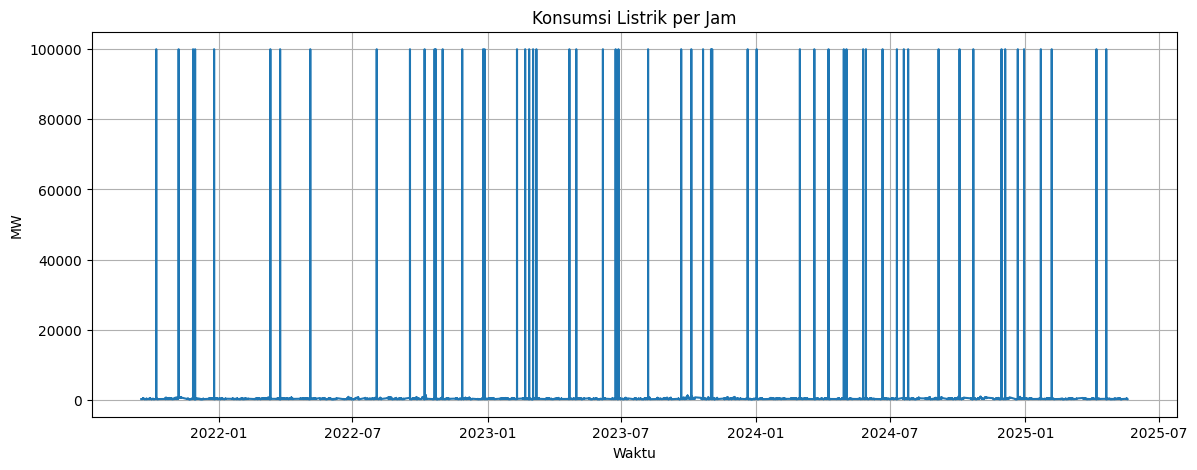

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualisasi konsumsi listrik
plt.figure(figsize=(14,5))
plt.plot(df_cleaned["tanggal_waktu"], df_cleaned["konsumsi_listrik"])
plt.title("Konsumsi Listrik per Jam")
plt.xlabel("Waktu")
plt.ylabel("MW")
plt.grid(True)
plt.show()

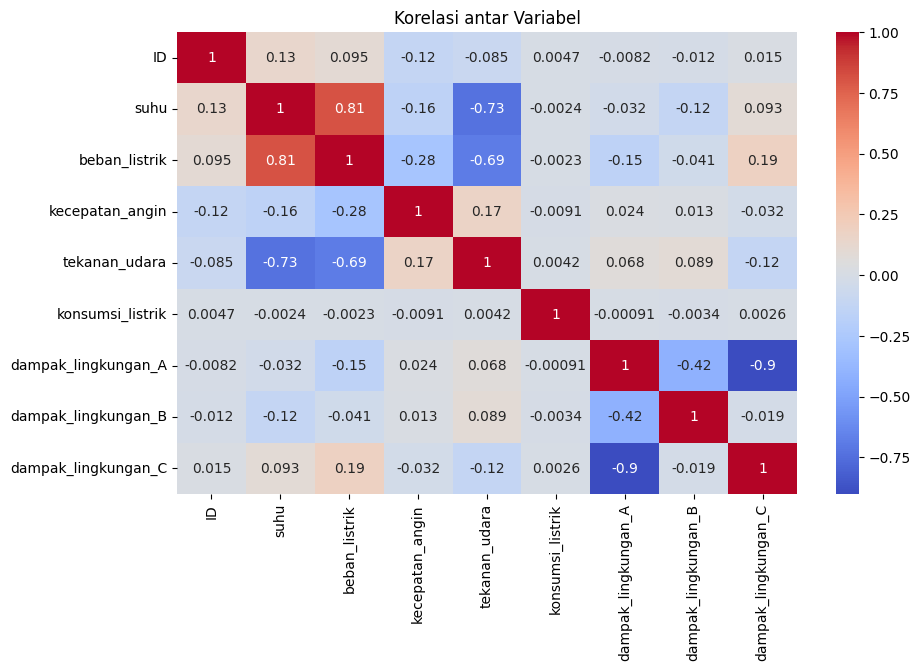

In [49]:
# Korelasi antar fitur
plt.figure(figsize=(10,6))
sns.heatmap(df_cleaned.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Korelasi antar Variabel")
plt.show()

## Modelling

### LSTM

In [50]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [51]:
# Fitur yang digunakan
features = ["suhu", "beban_listrik", "kecepatan_angin", "tekanan_udara",
            "dampak_lingkungan_B", "dampak_lingkungan_C"]

# Normalisasi
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(df_cleaned[features])
scaled_target = scaler.fit_transform(df_cleaned[["konsumsi_listrik"]])

In [52]:
# Buat sequence untuk LSTM
def create_sequences(features, target, time_steps=24):
    X, y = [], []
    for i in range(time_steps, len(features)):
        X.append(features[i-time_steps:i])
        y.append(target[i])
    return np.array(X), np.array(y)

X, y = create_sequences(scaled_features, scaled_target)

In [53]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False, test_size=0.2)

In [54]:
# Model LSTM
model = Sequential([
    LSTM(64, input_shape=(X.shape[1], X.shape[2]), return_sequences=False),
    Dense(32, activation='relu'),
    Dense(1)
])
model.compile(optimizer='adam', loss='mse')

C:\Users\LENOVO\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [55]:
# Train model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.1)

Epoch 1/10
547/547 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0041 - val_loss: 0.0032
Epoch 2/10
547/547 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0024 - val_loss: 0.0032
Epoch 3/10
547/547 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0025 - val_loss: 0.0031
Epoch 4/10
547/547 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0021 - val_loss: 0.0031
Epoch 5/10
547/547 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0022 - val_loss: 0.0031
Epoch 6/10
547/547 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0025 - val_loss: 0.0031
Epoch 7/10
547/547 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0019 - val_loss: 0.0031
Epoch 8/10
547/547 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0018 - val_loss: 0.0031
Epoch 9/10
547/547 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0017 - val_loss: 0.0031
Epoch 10/10
547/547 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0021 - val_loss: 0.0031


## Evaluasi

### LSTM

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error

def evaluate_model(df_test, forecast):
    mse = mean_squared_error(df_test, forecast)
    rmse = np.sqrt(mse)
    r2 = r2_score(df_test, forecast)
    mape = mean_absolute_percentage_error(df_test, forecast)

    # print(f'p = {p}, d = {d}, q = {q}')
    print(f'MSE = {mse:.4f}')
    print(f'RMSE = {rmse:.4f}')
    print(f'R² = {r2:.4f}')
    print(f'MAPE = {mape:.4f}')

In [56]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Prediksi
y_pred = model.predict(X_test)

# Inverse transform
y_pred_inv = scaler.inverse_transform(np.hstack((np.zeros((y_pred.shape[0], len(features))), y_pred)))[:, -1]
y_test_inv = scaler.inverse_transform(np.hstack((np.zeros((y_test.shape[0], len(features))), y_test)))[:, -1]

# Evaluasi
mse = mean_squared_error(y_test_inv, y_pred_inv)
mae = mean_absolute_error(y_test_inv, y_pred_inv)
r2 = r2_score(y_test_inv, y_pred_inv)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R-squared (R²): {r2:.2f}")


152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Mean Squared Error (MSE): 22459263.80
Mean Absolute Error (MAE): 361.84
R-squared (R²): -0.00


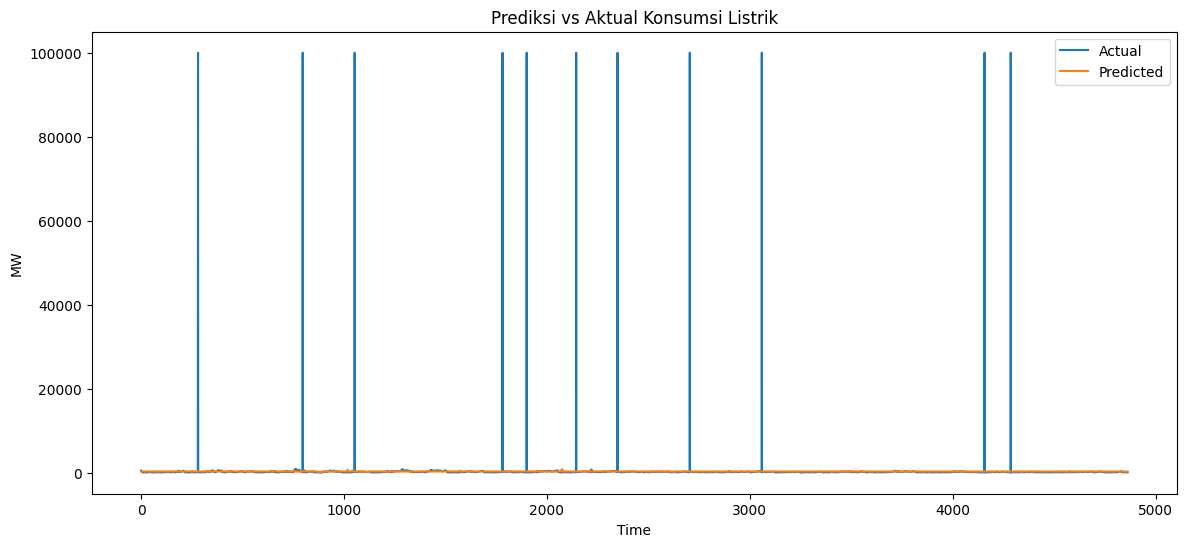

In [57]:
# Visualisasi hasil
plt.figure(figsize=(14,6))
plt.plot(y_test_inv, label="Actual")
plt.plot(y_pred_inv, label="Predicted")
plt.title("Prediksi vs Aktual Konsumsi Listrik")
plt.xlabel("Time")
plt.ylabel("MW")
plt.legend()
plt.show()

In [62]:
evaluate_model(y_test_inv, y_pred_inv)

MSE = 22459263.7980
RMSE = 4739.1206
R² = -0.0006
MAPE = 0.5517
